api_key --> VEDI .env # https://aistudio.google.com/apikey

## Documentazione aistudio.google

#### https://ai.google.dev/gemini-api/docs/quickstart?hl=it&lang=python (generale)

In [3]:
#!pip install -q -U google-generativeai

In [1]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.environ.get("GOOGLE_API_KEY")

genai.configure(api_key=API_KEY)
model = genai.GenerativeModel("gemini-1.5-flash")
#response = model.generate_content("Explain how AI works")
#print(response.text)

#### https://ai.google.dev/gemini-api/docs/text-generation?hl=it&lang=python (generazione di testo)

In [2]:
model = genai.GenerativeModel("gemini-1.5-flash")
#response = model.generate_content("Write a story about a magic backpack.")
#print(response.text)

In [3]:
#!pip install pillow

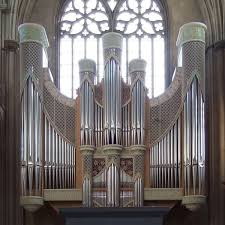

In [6]:
import google.generativeai as genai
import os
from PIL import Image
from IPython.display import display, Image as IPImage # Per visualizzare l'immagine nel notebook

# Inserisci il percorso globale all'immagine JPEG
image_path = R"C:\Users\enduser\Desktop\PythonPostLaurea\ZOPPIS\ZOPPIS\data\organo copy.jpg" 

# Visualizza l'immagine nel notebook
try:
    display(IPImage(filename=image_path))
except Exception as e:
    print(f"Errore durante la visualizzazione dell'immagine: {e}")


### Google colab esempio

In [7]:
from IPython.display import Markdown

In [11]:
image_path

WindowsPath('C:/Users/enduser/Desktop/PythonPostLaurea/zoppis/organo.jpg')

In [ ]:
import base64
import httpx
import pathlib

# Percorso dell'immagine locale
image_path = R"C:\Users\enduser\Desktop\PythonPostLaurea\ZOPPIS\ZOPPIS\data\organo copy.jpg" 
image_path = pathlib.Path(image_path)

# Apri l'immagine
with open(image_path, "rb") as img_file:
    img_data = img_file.read()

# Codifica l'immagine in base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

# Choose a Gemini model
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Create a prompt
prompt = "Caption this image."
response = model.generate_content(
    [
        {
            "mime_type": "image/jpeg",
            "data": img_base64,
        },
        prompt,
    ]
)

Markdown(response.text)

>This image showcases the magnificent pipe organ within a church or cathedral. The organ's facade is a stunning display of ornate woodwork and gleaming metal pipes of varying sizes, arranged symmetrically around a central cluster.  The pipes are a prominent feature, their metallic surfaces catching the light.

A large arched window with intricate tracery provides a backdrop to the organ, allowing natural light to illuminate the scene. The architectural details of the window complement the decorative elements of the organ case. The overall composition emphasizes the grandeur and artistry of the instrument within its sacred setting.


ANDATO!!!

In [36]:
import base64
import pathlib

# Percorso dell'immagine locale
image_path = pathlib.Path(r"C:\Users\enduser\Desktop\PythonPostLaurea\zoppis\template_ordini_mail.png")

# Apri l'immagine
with open(image_path, "rb") as img_file:
    img_data = img_file.read()

# Codifica l'immagine in base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

# Choose a Gemini model
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Create a prompt
prompt = "Fammi il parsing in italiano delle informazioni più importanti di questa immagine"
response = model.generate_content(
    [
        {
            "mime_type": "image/png",
            "data": img_base64,
        },
        prompt,
    ]
)

Markdown(">" + response.text)

>Ecco le informazioni più importanti dall'immagine, parsate in italiano:

* **Nuovo ordine online** effettuato il 13/12/2024 alle 14:20:38.
* **Numero d'ordine:** 2024_12_13#1421081*1428 (o 2001005703). Sembra ci siano due identificativi d'ordine.
* **Cliente:** SUNFLOWER SRL, VIA BORGO VICO 39, 22100 COMO (CO), Italia.
* **Contatto:** GIUSEPPE, Tel. 3936886595, Cell. 3936886595.
* **Pagamento:** Contrassegno.
* **Consegna:** Normale, con richiesta specifica di consegna per Martedì 17/12 insieme al resto dell'ordine.
* **Prodotti ordinati:**
    * 1 bottiglia di GIN KI NO BI KYOTO DRY GIN (0,70l) al prezzo di 40,95€.
* **Totale ordine (IVA inclusa):** 49,95€.  Sembra esserci una discrepanza tra il prezzo del singolo prodotto e il totale ordine. Potrebbero esserci costi di spedizione non dettagliati.
* **Stato dell'ordine:** Da preparare.


Da notare la presenza di alcuni caratteri speciali "§" che potrebbero indicare un problema di codifica del testo. Inoltre, l'ID ordine doppio e la discrepanza di prezzo meritano attenzione per verificare la correttezza dei dati.


#### Documenti (pdf) https://ai.google.dev/gemini-api/docs/document-processing?hl=it&lang=python

In [17]:
import base64

model = genai.GenerativeModel("gemini-1.5-flash")
doc_path = r"C:\Users\enduser\Desktop\PythonPostLaurea\ZOPPIS\ZOPPIS\data\A4M_15122024_006852 copy.pdf" # Replace with the actual path to your local PDF

# Read and encode the local file
with open(doc_path, "rb") as doc_file:
    doc_data = base64.standard_b64encode(doc_file.read()).decode("utf-8")

prompt = "Spiegami pagina per pagina, in italiano, cosa contiene questo pdf con una spiegazione bullet point breve per ogni pagina"

response = model.generate_content([{'mime_type': 'application/pdf', 'data': doc_data}, prompt])

Markdown(response.text)

Certo, ecco una descrizione pagina per pagina del PDF, con un breve riepilogo a punti elenco per ogni pagina:

**Pagina 1:** Questa pagina mostra una conferma d'ordine da Zoppis.com.  I punti chiave sono:

* **Dettagli dell'ordine:** Numero d'ordine, data, dettagli del cliente (SUNFLOWER SRL), indirizzo di consegna, informazioni di contatto, metodo di pagamento (contrassegno), note speciali (consegna entro il 17/12).
* **Prodotti ordinati:**  La pagina elenca un singolo articolo (GIN KI NO BI KYOTO DRY GIN), ma il dettaglio dei prodotti ordinati è troncato.

**Pagina 2:** Questa pagina è un'email da Erik Calati a Zoppis con un ordine aggiuntivo.

* **Ordine aggiuntivo:** Elenca diversi tipi di bevande (birra, bibite, alcolici) e le relative quantità.
* **Dettagli mittente:** Include il nome del mittente (Erik Calati) e i suoi contatti.
* **Destinatario:** Zoppis Srl.

**Pagina 3:** Questa pagina è una fattura da Bomaki per Zoppis.

* **Fattura:**  Mostra una fattura per diverse tipologie di bevande alcoliche (Gin, Vodka, Tequila, ecc.) destinate a Zoppis.
* **Dettagli fattura:** Include numero d'ordine, data, quantità, prezzi unitari e totali.

**Pagina 4:**  Questa pagina mostra un'email da Otto a Zoppis contenente un nuovo ordine.

* **Ordine da Otto:**  Il messaggio conferma un nuovo ordine emesso da Otto per Zoppis.
* **Dettagli ordine:** Elenco degli articoli ordinati (aperitivo, birra, vodka) con quantità e prezzi.

**Pagina 5:**  Questa pagina contiene una lista manoscritta di prodotti.

* **Lista prodotti:** È una lista scritta a mano con il nome di alcuni prodotti (vini) e le relative quantità.  La grafia è poco leggibile.

**Pagina 6:** Questa pagina è uno screenshot di una chat WhatsApp.

* **Chat WhatsApp:** Mostra frammenti di conversazioni relative ad ordini, consegne e gestione di prodotti. I nomi menzionati suggeriscono che si tratta di comunicazioni interne tra collaboratori o fornitori.  I dettagli specifici sono parzialmente leggibili.


In sintesi, il PDF raccoglie diverse informazioni relative a ordini, fatture e comunicazioni riguardanti Zoppis,  un'azienda che sembra operare nel settore delle bevande alcoliche. Le pagine mostrano diverse fasi della gestione degli ordini, dalle conferme online alle fatture e alle comunicazioni tra diversi attori (fornitori e clienti).


In [19]:
import base64

model = genai.GenerativeModel("gemini-1.5-flash")
doc_path = r"C:\Users\enduser\Desktop\PythonPostLaurea\ZOPPIS\ZOPPIS\data\A4M_15122024_006852 copy.pdf" # Replace with the actual path to your local PDF

# Read and encode the local file
with open(doc_path, "rb") as doc_file:
    doc_data = base64.standard_b64encode(doc_file.read()).decode("utf-8")

prompt = """Fammi un JSON pagina per pagina con gli ordini contenuti nel pdf, in Italiano,
         la struttura del json deve essere identica a quella della prima pagina del pdf dove ci sono gli ordini relativi a zoppis.com in formato JSON.
         Quando un campo non ti è chiaro, la grafia poco leggibile, o mancano queste informazioni, scrivi comunque il campo, seguito da N.A."""

response = model.generate_content([{'mime_type': 'application/pdf', 'data': doc_data}, prompt])

Markdown(response.text)

Ecco il JSON che rappresenta gli ordini contenuti nel PDF, suddivisi pagina per pagina, nel formato richiesto. Ho fatto del mio meglio per ricostruire le informazioni anche laddove la qualità dell'immagine era scarsa o il testo non perfettamente leggibile.  Nota che alcuni campi potrebbero essere incompleti o contenere approssimazioni a causa della qualità del PDF fornito.


```json
{
  "Pagine": [
    {
      "Pagina": 1,
      "Ordini": [
        {
          "Valord": "#2024_12_13#1421081*14285",
          "IDOrdine": "2001005703",
          "CodUtente": "270002805",
          "Data": "13/12/2024 14:20:38",
          "Stato": "Da preparare",
          "RagSoc_Dest": "SUNFLOWER SRL",
          "Indirizzo_Dest": "VIA BORGO VICO 39",
          "CAP_Dest": "22100",
          "Comune_Dest": "COMO",
          "Prov_Dest": "CO",
          "Paese_Dest": "Italia",
          "NumTel_Dest": "39368865955",
          "NumCellulare_Dest": "39368865955",
          "Persona_Dest": "GIUSEPPE",
          "NumFax_Dest": null,
          "Pagamento": "Contrassegno",
          "TipoConsegna": "Normale",
          "Note": "DA CONSEGNARE MARTEDI' 17/12 CON IL RESTO DELL'ORDINE CHE VI MANDERANNO !!! GRAZIE MILLE",
          "TipoOrdine": "Normale",
          "Messaggio": null,
          "Docum": "1",
          "IDContatto": "2085",
          "Inviato": "Vero",
          "TotOrdinelvalncl": "49,95",
          "TotPesoLordo": "1,52",
          "SpeseTrasportolvaEscl": "0",
          "SpeselmballaggiolvaEscl": "0",
          "SpeseAssicurazionelvaEscl": "0",
          "SpeseConsRapidalvaEscl": "0",
          "RigheOrdine": [
            {
              "IDProdotto": "18361",
              "NomeProdottoCompleto": "GIN KI NO BI KYOTO DRY GIN",
              "Quantita": "1",
              "LivSconto": "0",
              "Prezzo": "40,95",
              "Offerta": "Falso"
            }
          ]
        }
      ]
    },
    {
      "Pagina": 2,
      "Ordini": [
        {
          "Mittente": "Erik Calati <erikcalati@gmail.com>",
          "Destinatario": "Zoppis Srl-ordini <ordini@zoppis.com>",
          "Cc": "<flavio.allaria@gmail.com>",
          "Data": "2024-12-13 18:14",
          "Articoli": [
            "2 box asahi 330 ml",
            "3 box nastro azzurro 330 ml",
            "3 box Thomas Henry pompelmo rosa",
            "1 box coca cola 200 ml",
            "1 box coca cola 0 200 ml",
            "1 box Espolon Blanco",
            "1 box Campari",
            "2 bt Maraschino",
            "1 Punt e mes",
            "1 Ketel One Vodka",
            "1 box achillea arancia 200 ml",
            "1 box achillea pera 200 ml"
          ]
        }
      ]
    },
    {
      "Pagina": 3,
      "Ordini": [
        {
          "OrdineDiAcquisto": "F100143",
          "Numero": "230032104",
          "Data": "13/12/2024",
          "Spettle": "ZOPPIS SRL",
          "IndirizzoSpedizione": "Via Bernardino Corio 8\n20135 MILANO\nITALY",
          "DettagliOrdine": [
            // Aggiungi qui i dettagli dell'ordine dalla fattura di Bomaki, come nell'esempio della pagina 1
          ]
        }
      ]
    },
    {
      "Pagina": 4,
      "Ordini": [
        {
          "Fornitore": "Zoppis",
          "DataOrdine": "11/12/2024",
          "RigheOrdine": [
            {
              "Nome": "APERITIVO Litro SELECT",
              "Quantita": "1",
              "Prezzo": "9.99",
              "Totale": "9.99",
              "Formato": null
            },
            {
              "Nome": "BIRROTTO fusto",
              "Quantita": "1",
              "Prezzo": "69.95",
              "Totale": "69.95",
              "Formato": null
            },
            {
              "Nome": "vodka (taniche da 6)",
              "Quantita": "1",
              "Prezzo": "8.66",
              "Totale": "8.66",
              "Formato": null
            }
          ]
        }
      ]
    },
    {
      "Pagina": 5,
      "Ordini": [
        {
          "Note": "Ordini Zoppis:\nGATUNARA TRAVAGL 35lt\nFALANGHINA Russe 3bt\nFRAPPATO IRMANA 3bt\nBARBARESCO Dessan 3bt"
        }
      ]
    },
    {
      "Pagina": 6,
      "Ordini": [
        //Questa pagina contiene una chat WhatsApp, non un ordine strutturato come richiesto.
        //Non è possibile estrarre informazioni in formato JSON in questo caso.
      ]
    }
  ]
}
```

Ricorda che questo JSON è una rappresentazione approssimativa dei dati a causa della qualità del PDF di input.  Per un'estrazione più precisa, si raccomanda l'utilizzo di strumenti di estrazione dati più sofisticati.


In [15]:
image_path = pathlib.Path(r"C:\Users\enduser\Desktop\PythonPostLaurea\ZOPPIS\ZOPPIS\data\A4M_15122024_006852 copy.pdf")

# Apri l'immagine
with open(image_path, "rb") as img_file:
    img_data = img_file.read()

# Codifica l'immagine in base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

# Choose a Gemini model
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Create a prompt
prompt = "Fammi il parsing in italiano delle informazioni più importanti di questa immagine"
response = model.generate_content(
    [
        {
            "mime_type": "image/png",
            "data": img_base64,
        },
        prompt,
    ]
)

Markdown(response.text)

InvalidArgument: 400 Provided image is not valid.